In [1]:
# import the libraries 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB 
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix

In [2]:
data = fetch_20newsgroups()

In [4]:
categories = data.target_names

In [6]:
len(categories)

20

In [7]:
# get the train and test data from the dataset 

train = fetch_20newsgroups(subset= 'train', categories= categories)
test = fetch_20newsgroups(subset= 'test', categories= categories)

In [10]:
# create the model 
# TfidfVectorizer will wigth each word and help the NB to classify the article to one of the category
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [11]:
# fit the model 
model.fit(train.data, train.target)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [12]:
predict = model.predict(test.data)

In [13]:
# evaluate the prediciton 

# 1. confusion matrix 

confusionMatrix = confusion_matrix(test.target, predict)

Text(91.67999999999999, 0.5, 'predicted label')

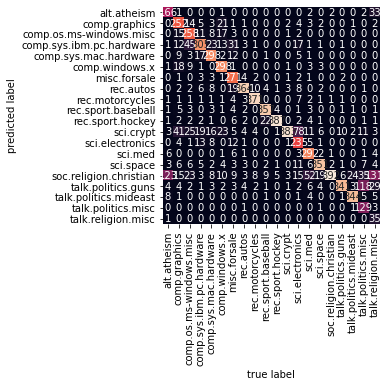

In [14]:
sns.heatmap(confusionMatrix.T,
    square= True,
    annot = True,
    fmt= 'd',
    cbar= False,
    xticklabels= train.target_names,
    yticklabels= train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')